# Feature Engineering: Time Series Data

## Introduction

This tutorial will introduce some basic methods for extracting features from raw data, particularly focusing on Time Series data. A vibration signal, an acoustic signal are a few types of time series data.

### Tutorial Content

1. What is Feature Engineering
2. Dataset
3. Problem Statement
4. Data Visualization and Preprocessing
5. Feature Extraction
6. Modeling and Performance Evaluation
7. Feature Importance
8. Conclusion
9. Additional Resources
10. Appendix

### What is Feature Engineering?

Feature Engineering is an important step in solving Machine Learning problem. It is a process to extract useful information based on domain knowledge from raw data. The extracted useful information is a set of features that help machine learning algorithm to solve the problem with improved performance. 

A feature is a numeric representation of raw data. There are many ways to extract features from raw data. The right features are relevant to the task at hand and should be easy for the model to ingest. Feature engineering is the process of formulating the most appropriate features given the data, the model, and the task. 

The number of features is also important. If there are not enough informative features, then the model will be unable to perform the ultimate task. If there are too many features, or if most of them are irrelevant, then the model will be more expensive and tricky to train. Something might go awry in the training process that impacts the model’s performance.

There is a set of steps in modeling any machine learning problem. Effectiveness of these steps ultimately decides the overall performance of the model. The following figure represents a general outline.

![Machine Learning Pipeline](figure1.png)

Now that we know what Feature Engineering is, we will apply these feature engineering principles on a real-life dataset. 

### Dataset

In this tutorial, we will use Case Western Reserve Univeristy Bearing Dataset. The dataset is collected by Case Western University Bearing Center. The dataset is publically made available for the research and academic purpose.

The dataset contains vibration signals generated by ball bearings that are captured by accelerometers. The purpose of the experimentation is to asses the motor bearing condition under different loads. The experimental setup has an eletric motor and load cell that vary the amount of load on bearing. Following diagram shows the actual experimental setup. (credit: CWRU Bearing Center)

![Experimental setup](figure2.jpg)

There are total 2800 vibration signals captured from different types of bearings. There are mainly 4 types of bearings. Each signal has a length of 1600. 
1. Normal bearing
2. Inner race fault bearing
3. Outer race fault bearing
4. Ball fault bearing


Each of the faulty bearing is then subgrouped into 3 more categories based on its fault size. So in total, there are 10 different types of signals

### Problem Statement

Given a vaibration signal of any bearing, we want to predict what kind of fault the bearing has. In the given dataset, all vibration signals has 1600 values. These are the raw values captured by accelerometer. We want to use these raw signals as input and predict the class of its fault.


Here, we are basically sovling a classification problem using machine learning.

### Data Visualization and Preprocessing

Let us now load the data. The data is stored as an array in '.npy' file format. Labels are also stored in the same file format. After loading the data, we will print the shape and visualize the data.

In [2]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x_data = np.load('signal_data.npy', allow_pickle = True)
y_data = np.load('signal_data_labels.npy', allow_pickle = True)

In [5]:
print('Total number of data: ',x_data.shape[0])
print('Signal length: ',x_data.shape[1])
print('Classes: ', np.unique(y_data))

Total number of data:  2800
Signal length:  1600
Classes:  [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


Let us now plot a few signals of different classes

[Text(0, 0.5, 'Amplitude'), Text(0.5, 0, 'Time')]

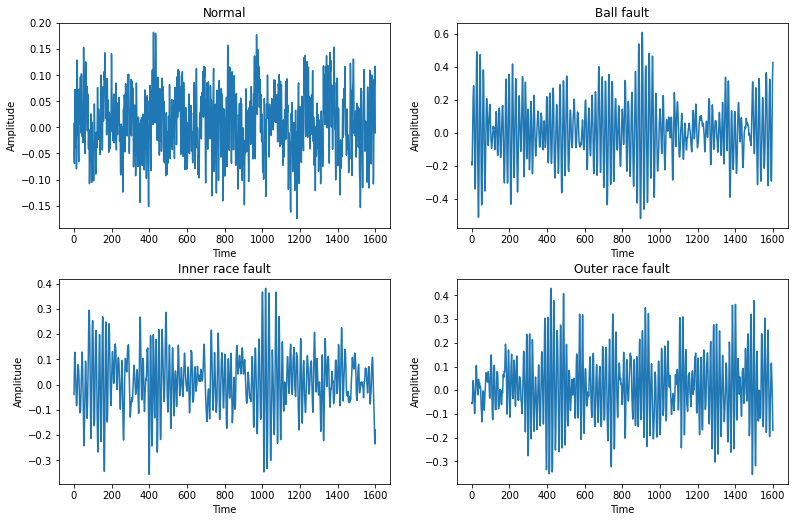

In [51]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
fig.subplots_adjust(hspace=.25)
((ax1, ax2), (ax3, ax4)) = axs
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
ax1.plot(x_data[150], label = 'Vibration signal')
ax1.set_title('Normal')
ax1.set(ylabel='Amplitude', xlabel='Time')
ax2.plot(x_data[1000], label = 'Vibration signal')
ax2.set_title('Ball fault')
ax2.set(ylabel='Amplitude', xlabel='Time')
ax3.plot(x_data[1500], label = 'Vibration signal')
ax3.set_title('Inner race fault')
ax3.set(ylabel='Amplitude', xlabel='Time')
ax4.plot(x_data[2500], label = 'Vibration signal')
ax4.set_title('Outer race fault')
ax4.set(ylabel='Amplitude', xlabel='Time')

These signals are very much alike. Vibration signals are generally normalized before we start feature extraction. The normalization of the signal comes under preprocessing step. There are a few other steps as well that are performed during preprocessing such as noise removal, outlier analysis. For the purpose of this tutorial, we will only normalize the signals.

Normalization is a rescaling of the data from the original range so that all values are within the range of 0 and 1.
Normalization can be useful, and even required in some machine learning algorithms when your time series data has input values with differing scales.

There are different normalization techniques such as RMS normalization, mean normalization. Here we will be using Min-Max scaling method.

In [63]:
x_norm_data = (x_data - np.min(x_data, axis = 1, keepdims = True))/(np.max(x_data, axis = 1, keepdims = True) - np.min(x_data, axis = 1, keepdims = True))

### Scaled data after Normalization

[Text(0, 0.5, 'Amplitude'), Text(0.5, 0, 'Time')]

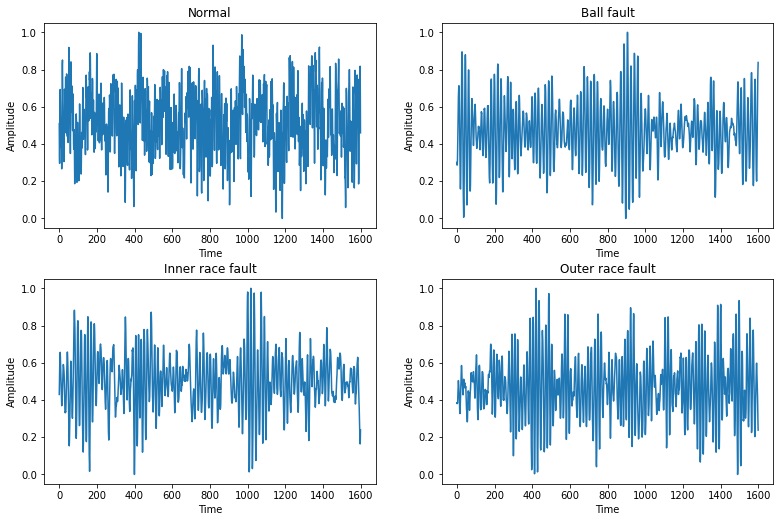

In [64]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
fig.subplots_adjust(hspace=.25)
((ax1, ax2), (ax3, ax4)) = axs
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
ax1.plot(x_norm_data[150], label = 'Vibration signal')
ax1.set_title('Normal')
ax1.set(ylabel='Amplitude', xlabel='Time')
ax2.plot(x_norm_data[1000], label = 'Vibration signal')
ax2.set_title('Ball fault')
ax2.set(ylabel='Amplitude', xlabel='Time')
ax3.plot(x_norm_data[1500], label = 'Vibration signal')
ax3.set_title('Inner race fault')
ax3.set(ylabel='Amplitude', xlabel='Time')
ax4.plot(x_norm_data[2500], label = 'Vibration signal')
ax4.set_title('Outer race fault')
ax4.set(ylabel='Amplitude', xlabel='Time')

### Feature Extraction

After normalizing the signal, we will start extracting features from the signals. We will be extracting simple yet powerful statistical features in order to classify these signals. There are a few features that are specific to vibration signal analysis such as Crest factor, Shape factor. At the root, these features are also statistical in nature.
We will extract the following 20 features.

1. mean
2. median
3. min
4. max
5. peak_to_peak
6. variance
7. rms
8. absolute_mean
9. shape_factor
10. impulse_factor
11. crest_factor
12. clearance_factor
13. std
14. skewness
15. kurtosis
16. abslogmean
17. meanabsdev
18. medianabsdev
19. midrange
20. coeff_var

In the appendix, all the features are explained.

In [202]:
# Importing required libraries
import scipy.stats

class Featurizer():
    """
    Featurizer currently supports the 20 features below. Each
    supported feature is contained within its own method.
    
    """
    
    def __init__(self, data, axis = 1):
        self.data = data
        self.axis = axis
    
    def mean(self):
        ans = np.mean(self.data, self.axis)
        return ans

    def median(self):
        ans = np.median(self.data, self.axis)
        return ans

    def min_value(self):
        ans = np.min(self.data, self.axis)
        return ans

    def max_value(self):
        ans = np.max(self.data, self.axis)
        return ans

    def peak_to_peak(self):
        ans = np.max(self.data, self.axis) - np.min(self.data, self.axis)
        return ans

    def variance(self):
        ans = np.var(self.data, self.axis)
        return ans

    def rms(self):
        ans = np.sqrt(np.mean(self.data ** 2, self.axis))
        return ans

    def abs_mean(self):
        ans = np.mean(np.absolute(self.data), self.axis)
        return ans

    def shapefactor(self):
        ans = self.rms() / self.abs_mean()
        return ans

    def impulsefactor(self):
        ans = np.max(np.absolute(self.data), self.axis) / self.abs_mean()
        return ans

    def crestfactor(self):
        ans = np.max(np.absolute(self.data), self.axis) / np.sqrt(np.mean(self.data ** 2, self.axis))
        return ans

    def clearancefactor(self):
        ans = np.max(np.absolute(self.data), self.axis)
        ans /= ((np.mean(np.sqrt(np.absolute(self.data)), self.axis)) ** 2)
        return ans

    def std(self):
        ans = np.std(self.data, self.axis)
        return ans

    def skew(self):
        ans = scipy.stats.skew(self.data, self.axis)
        return ans

    def kurtosis(self):
        ans = scipy.stats.kurtosis(self.data, self.axis)
        return ans

    def abslogmean(self):
        ans = np.mean(np.log(np.abs(self.data)+1e-12), self.axis)
        return ans

    def meanabsdev(self):
        if self.axis == 0:
            ans = np.mean(np.abs(self.data - np.mean(self.data, self.axis)), self.axis)
        else:
            ans = np.mean(
                np.abs(self.data - np.mean(self.data, self.axis).reshape(self.data.shape[0], 1)), self.axis)
        return ans

    def medianabsdev(self):
        if self.axis == 0:
            ans = np.median(np.abs(self.data - np.median(self.data, self.axis)), self.axis)
        else:
            ans = np.median(
                np.abs(self.data - np.median(self.data, self.axis).reshape(self.data.shape[0], 1)), self.axis)
        return ans

    def midrange(self):
        ans = (np.max(self.data, self.axis) + np.min(self.data, self.axis)) / 2
        return ans

    def coeff_var(self):
        ans = scipy.stats.variation(self.data, self.axis)
        return ans
    
    all_funcs = [mean, median, min_value, max_value, peak_to_peak, variance, \
                rms, abs_mean, shapefactor, impulsefactor,crestfactor, clearancefactor, \
                std, skew, kurtosis, abslogmean, meanabsdev, medianabsdev, midrange, coeff_var]
    
    features = ['mean', 'median', 'min_value', 'max_value', 'peak_to_peak', 'variance', \
                'rms', 'abs_mean', 'shapefactor', 'impulsefactor', 'crestfactor', 'clearancefactor', \
                'std', 'skew', 'kurtosis', 'abslogmean', 'meanabsdev', 'medianabsdev', 'midrange', 'coeff_var']
        

Let us now use the above class to extract the features for our dataset. The class needs to be instantiated with a dataset and axis along which we want to extract features. Generally, every single data point is stored in a row. Hence, default axis is set to 1.

In [203]:
# Instantiating the class
f = Featurizer(x_data, axis = 1)
# Saving all the features of the data
featurized_data = []
for func in f.all_funcs:
    featurized_data.append(func(f))
featurized_data = np.array(featurized_data).T #(datapoints in rows and features in columns)

Let us see the shape of our featurized data

In [123]:
print('Shape of the Featurized data: ', featurized_data.shape)

Shape of the Featurized data:  (2800, 20)


For each signal, we have calculated 20 features. Now its time to train models and see how our feature extraction works

### Modeling and Performance Evaluation

In the modeling part, we will train classical machine learning algorithms on raw data and featurized data. For the purpose of this tutorial, we will train the following algorithms.

1. Random Forest
2. Support Vector Classifier
3. Logistic Regression
4. k Nearest Neighbors

In [164]:
# Importing all the required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

#### Training with raw data

Let us train the models directly on raw data with default setting. Here we will report the 5 fold accuracy as we dont have separate test set.

Random Forest

In [146]:
rf = RandomForestClassifier()
rf_raw_scores = cross_val_score(rf, x_data, y_data, cv=5)
rf_raw_acc = np.mean(rf_raw_scores)

Support Vector Classifier

In [137]:
svc = SVC()
svc_raw_scores = cross_val_score(svc, x_data, y_data, cv=5)
svc_raw_acc = np.mean(svc_raw_scores)

Logistic Regression

In [140]:
lr = LogisticRegression()
lr_raw_scores = cross_val_score(lr, x_data, y_data, cv=5)
lr_raw_acc = np.mean(lr_raw_scores)

k Nearest Neighbors

In [162]:
knn = KNeighborsClassifier()
knn_raw_scores = cross_val_score(knn, x_data, y_data, cv=5)
knn_raw_acc = np.mean(knn_raw_scores)

#### Result on raw data

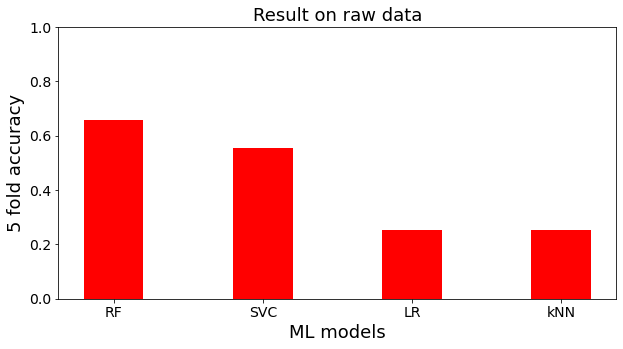

In [284]:
data_r = {'RF':rf_raw_acc, 'SVC':svc_raw_acc, 'LR':lr_raw_acc, 'kNN':knn_raw_acc}
algorithm = list(data_r.keys())
accuracy = list(data_r.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(algorithm, accuracy, color ='red', width = 0.4)
plt.xlabel("ML models", fontsize = 18)
plt.ylabel("5 fold accuracy", fontsize = 18)
plt.title("Result on raw data", fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylim([0, 1])
plt.show()

As we can see, the ML algorithms are not able achieve high accuracies on just raw data. The maximum accuracy is achieved by Random Forest. Following are the algorithm wise result.
1. Random Forest: 65.68%
2. Support Vector Classified: 55.43%
3. Logistic Regression: 25.21%
4. k Nearest Neighbors: 25.21%

#### Training with featurized data

Random Forest

In [250]:
rf = RandomForestClassifier()
rf_f_scores = cross_val_score(rf, featurized_data, y_data, cv=5)
rf_f_acc = np.mean(rf_f_scores)

Support Vector Classifier

In [251]:
svc = SVC()
svc_f_scores = cross_val_score(svc, featurized_data, y_data, cv=5)
svc_f_acc = np.mean(svc_f_scores)

Logistic Regression

In [252]:
lr = LogisticRegression()
lr_f_scores = cross_val_score(lr, featurized_data, y_data, cv=5)
lr_f_acc = np.mean(lr_f_scores)

k Nearest Neighbors

In [253]:
knn = KNeighborsClassifier()
knn_f_scores = cross_val_score(knn, featurized_data, y_data, cv=5)
knn_f_acc = np.mean(knn_f_scores)

#### Result on featurized data

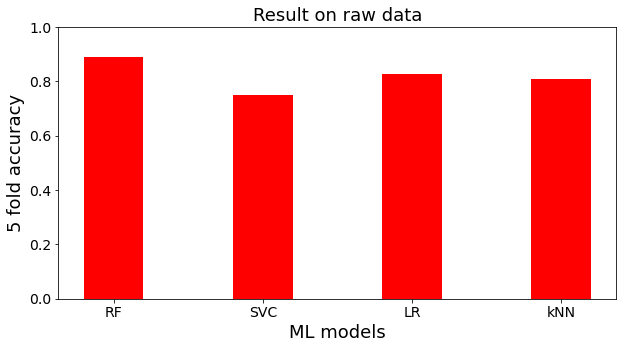

In [283]:
data_f = {'RF':rf_f_acc, 'SVC':svc_f_acc, 'LR':lr_f_acc, 'kNN':knn_f_acc}
algorithm = list(data_f.keys())
accuracy = list(data_f.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(algorithm, accuracy, color ='red', width = 0.4)
plt.xlabel("ML models", fontsize = 18)
plt.ylabel("5 fold accuracy", fontsize = 18)
plt.title("Result on raw data", fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylim([0, 1])
plt.show()

The ML algorithms are now able achieve higher accuracies on featurized data compared to raw data. The maximum accuracy is achieved by Random Forest. Following are the algorithm wise result.
1. Random Forest: 89.50%
2. Support Vector Classified: 74.89%
3. Logistic Regression: 82.68%
4. k Nearest Neighbors: 81.00%

### Feature Importance

Now that we have found out that the featurization improves the performance, let us see which features are important for classifying the signals. We will use in-built module of Random Forest algorithm.

In [255]:
RF = RandomForestClassifier()
RF.fit(featurized_data, y_data)

RandomForestClassifier()

In [256]:
features = f.features

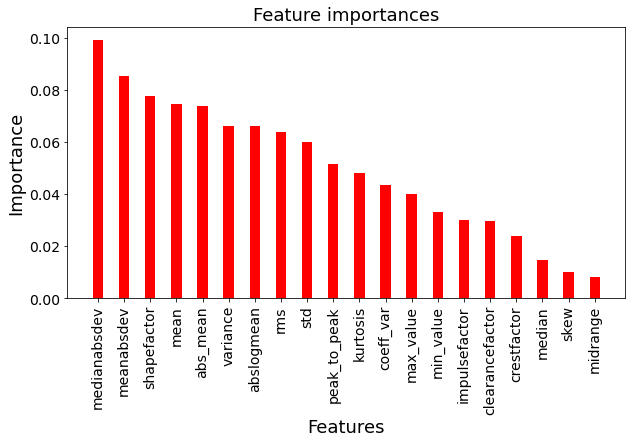

In [286]:
importances = RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
indi = [features[i] for i in indices]
plt.figure(figsize = (10, 5))
plt.title("Feature importances", fontsize = 18)
plt.bar([i*2 for i in range(len(features))], importances[indices], color="r")
plt.xlabel('Features', fontsize = 18)
plt.ylabel('Importance', fontsize = 18)
plt.xticks([i*2 for i in range(len(features))], indi, rotation='vertical', fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

medianabsdev, meanabsdev, shape factor, mean and abs mean are the first five important features for Random Forest algorithm. 

### Conclusion

We have shown that Feature Extraction is an important step in any machine learning pipeline which deals with raw data in the form continuos time series signal. Feature extraction process is specific to problem nature and dataset. It helps in achieving better performance. We have demonstrated this on a real-life dataset.
The performance improvement is significaant as shown in the figure below. 

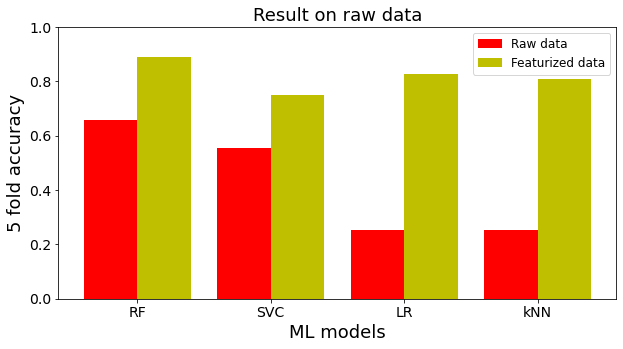

In [295]:
num_bars = np.arange(4)
algorithms = list(data_r.keys())
fig = plt.figure(figsize = (10, 5))
plt.bar(num_bars - 0.2, data_r.values(), color ='r', width = 0.4, label = 'Raw data')
plt.bar(num_bars + 0.2, data_f.values(), color ='y', width = 0.4, label = 'Featurized data')
plt.legend(fontsize = 12)
plt.xlabel("ML models", fontsize = 18)
plt.ylabel("5 fold accuracy", fontsize = 18)
plt.title("Result on raw data", fontsize = 18)
plt.xticks([i for i in range(len(algorithms))], algorithms, fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylim([0, 1])
plt.show()

### Additional Resources

1. Book: Feature engineering for machine learning : principles and techniques for data scientists, Zheng, Alice, author.; Casari, Amanda, author. 2018
2. Website: https://csegroups.case.edu/bearingdatacenter/pages/welcome-case-western-reserve-university-bearing-data-center-website
3. Research paper: W. Caesarendra and T. Tjahjowidodo, "A review of feature extraction methods in vibration-based condition monitoring and its application for degradation trend estimation of low-speed slew bearing", Machines, vol. 5, no. 4, pp. 21, Sep. 2017.


### Appendix

Following are the features used for classifying the signals.

**Mean**: The statistical mean is an arithmetic mean process, in that it adds up all numbers in a data set, and then divides the total by the number of data points.

**Median**: To find the median, the observations are arranged in order from smallest to largest value. If there is an odd number of observations, the median is the middle value. If there is an even number of observations, the median is the average of the two middle values.

**Min_value**: the minimum number in a set of numbers

**Max_value**: the maximum number in a set of numbers

**peak_to_peak**: the difference between the maximun and minimum numbers in a set of numbers

**variance**: Variance describes how much a random variable differs from its expected value.The variance is defined as the average of the squares of the differences between the individual (observed) and the expected value. That means it is always positive. In practice, it is a measure of how much something changes.

**rms**: The RMS value of a set of values is the square root of the arithmetic mean of the squares of the values, or the square of the function that defines the continuous waveform. In the case of the RMS statistic of a random process, the expected value is used instead of the mean.

**abs_mean**: The abs_mean value of a set of values is the arithmetic mean of all the absolute values in a given set of numbers.

**shapefactor**: Shape factor refers to a value that is affected by an object's shape but is independent of its dimensions. It is a ratio of RMS value to the absolute mean of a given set of numbers.

**impulsefactor**: Impulse factor refers to a value that is affected by an absolute maximum values. It is a ratio of maximum of absolute values to the absolute mean of a given set of numbers.

**crestfactor**: Crest factor refers to a value that is affected by an absolute maximum values. It is a ratio of maximum of absolute values to the RMS value of a given set of numbers. Crest factor indicates how extreme the peaks are in a wave. Crest factor 1 indicates no peaks.

**clearancefactor**: Clearance factor is peak value divided by the squared mean value of the square roots of the absolute amplitudes.

**std**: In statistics, the standard deviation is a measure of the amount of variation or dispersion of a set of values. A low standard deviation indicates that the values tend to be close to the mean of the set, while a high standard deviation indicates that the values are spread out over a wider range.

**skew**: In statistics, skewness is a measure of the asymmetry of the distribution of a real-valued observations about its mean. The skewness value can be positive, zero, negative, or undefined.

**kurtosis**: Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution. In other words, kurtosis identifies whether the tails of a given distribution contain extreme values.

**abslogmean**: abslogmean is a statistical measure which stands for absolute logarithmic mean of a series of observations. Its takes a mod of each value followed by log and then a mean of the resultant log values

**meanabsdev**: meanabsdev is a statistical measure which stands for mean absolute deviation of a series of observations. The average absolute deviation, or mean absolute deviation (MAD), of a data set is the average of the absolute deviations from a central point. It is a summary statistic of statistical dispersion or variability.

**medianabsdev**: medianabsdev is a statistical measure which stands for median absolute deviation of a series of observations. The median absolute deviation of a data set is the meadian of the absolute deviations from a central point. It is a summary statistic of statistical dispersion or variability.

**midrange**: In statistics, the mid-range or mid-extreme of a set of statistical data values is the arithmetic mean of the maximum and minimum values in a data set.

**coeff_var**: coeff_var stands for coefficient of variation. In statistics, the coefficient of variation (CV), also known as relative standard deviation (RSD), is a standardized measure of dispersion of a distribution. It is often expressed as a percentage, and is defined as the ratio of the standard deviation to the mean.